# Introduction to Difference in Differences

ECON526

Paul Schrimpf (University of British Columbia)

# Introduction

## Introduction

-   Have some policy applied to some observations but not others, and
    observe outcome before and after policy

-   Idea: compare outcome before and after policy in treated and
    untreated group

-   Change in outcome in treated group reflects both effect of policy
    and time trend, change in untreated group captures time trend

## Example: Impact of Billboards

-   From Facure (2022) chapter 13
-   Bank placed billboards advertising savings accounts in Porto Alegre
    in July
-   Data on deposits in May and July in Porto Alegre and Florianopolis

## Example: Impact of Billboards

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf

datadir="./data"

In [2]:
data = pd.read_csv(datadir + "/billboard_impact.csv")
data.head()

## Means and Differences

In [3]:
tbl = data.groupby(['jul','poa']).mean().unstack()
tbl

In [4]:
tbl.diff(axis=0).iloc[1,:]

          poa
deposits  0      34.523192
          1      41.047750
Name: 1, dtype: float64

In [5]:
tbl.diff(axis=1).iloc[:,1]

jul
0   -125.626308
1   -119.101750
Name: (deposits, 1), dtype: float64

In [6]:
tbl.diff(axis=0).diff(axis=1).iloc[1,1]

np.float64(6.524557692307688)

# Difference in Differences

$$ %
\def\Er{{\mathrm{E}}}
\def\En{{\mathbb{E}_n}}
\def\cov{{\mathrm{Cov}}}
\def\var{{\mathrm{Var}}}
\def\R{{\mathbb{R}}}
\newcommand\norm[1]{\left\lVert#1\right\rVert}
\def\rank{{\mathrm{rank}}}
\newcommand{\inpr}{ \overset{p^*_{\scriptscriptstyle n}}{\longrightarrow}}
\def\inprob{{\,{\buildrel p \over \rightarrow}\,}}
\def\indist{\,{\buildrel d \over \rightarrow}\,}
\DeclareMathOperator*{\plim}{plim}
$$

## Setup

-   Two periods, binary treatment in second period
-   Potential outcomes $\{y_{it}(0),y_{it}(1)\}_{t=0}^1$ for $i=1,...,N$
-   Treatment $D_{it} \in \{0,1\}$,
    -   $D_{i0} = 0$ $\forall i$
    -   $D_{i1} = 1$ for some, $0$ for others
-   Observe $y_{it} = y_{it}(0)(1-D_{it}) + D_{it} y_{it}(1)$

## Identification

-   Average treatment effect on the treated:

$$ %
\begin{align*}
ATT & = \Er[y_{i1}(1) - \color{red}{y_{i1}(0)} | D_{i1} = 1] \\
& = \Er[y_{i1}(1) - y_{i0}(0) | D_{i1} = 1] - \Er[\color{red}{y_{i1}(0)} - y_{i0}(0) | D_{i1}=1] \\
& \text{ assume } \Er[\color{red}{y_{i1}(0)} - y_{i0}(0) | D_{i1}=1] =  \Er[y_{i1}(0) - y_{i0}(0) | D_{i1}=0] \\
& = \Er[y_{i1}(1) - y_{i0}(0) | D_{i1} = 1] - \Er[y_{i1}(0) - y_{i0}(0) | D_{i1}=0] \\
& = \Er[y_{i1} - y_{i0} | D_{i1}=1, D_{i0}=0] - \Er[y_{i1} - y_{i0} | D_{i1}=0, D_{i0}=0]
\end{align*}
$$

## Important Assumptions

-   No anticipation: $D_{i1}=1$ does not affect $y_{i0}$
    -   built into the potential outcomes notation we used, relax by
        allowing potential outcomes given sequence of $D$,
        i.e. $y_{it}(D_{i0},D_{i1})$
-   Parallel trends:
    $\Er[\color{red}{y_{i1}(0)} - y_{i0}(0) |D_{i1}=1,D_{i0}=0] =  \Er[y_{i1}(0) - y_{i0}(0) | D_{i1}=0], D_{i0}=0]$
    -   not invariant to tranformations of $y$

## Estimation

-   Plugin: $$ %
    \widehat{ATT} = \frac{ \sum_{i=1}^n (y_{i1} - y_{i0})D_{i1}(1-D_{i0})}{\sum_{i=1}^n D_{i1}(1-D_{i0})} -  \frac{ \sum_{i=1}^n (y_{i1} - y_{i0})(1-D_{i1})(1-D_{i0})}{\sum_{i=1}^n (1-D_{i1})(1-D_{i0})}
    $$

-   Regression: $$ %
    y_{it} = \delta_t + \alpha 1\{D_{i1}=1\} + \beta D_{it} + \epsilon_{it}
    $$ then $\hat{\beta} = \widehat{ATT}$

# Billboard Application Revisited

## Visualizing Difference in Differences

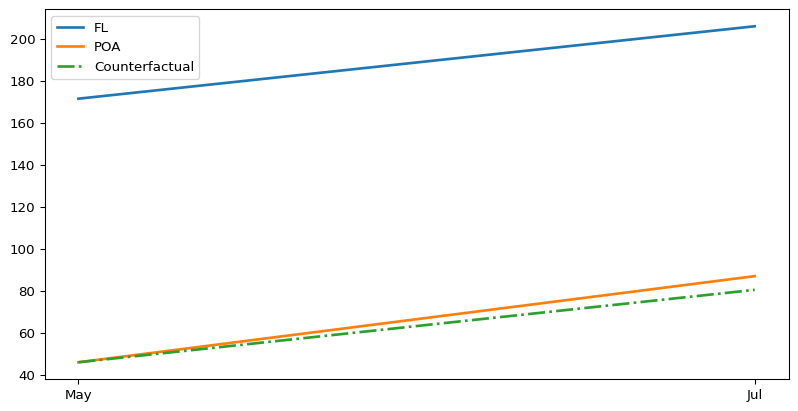

In [7]:
poa_before = data.query("poa==1 & jul==0")["deposits"].mean()
poa_after = data.query("poa==1 & jul==1")["deposits"].mean()
fl_before = data.query("poa==0 & jul==0")["deposits"].mean()
fl_after = data.query("poa==0 & jul==1")["deposits"].mean()
plt.figure(figsize=(10,5))
plt.plot(["May", "Jul"], [fl_before, fl_after], label="FL", lw=2)
plt.plot(["May", "Jul"], [poa_before, poa_after], label="POA", lw=2)

plt.plot(["May", "Jul"], [poa_before, poa_before+(fl_after-fl_before)],
         label="Counterfactual", lw=2, color="C2", ls="-.")

plt.legend();

## Estimation via Regression

In [8]:
smf.ols('deposits ~ poa*jul', data=data).fit().summary().tables[1]

## Further Topics

-   More periods, more groups
-   Covariates
-   Pre-trends

## Reading

-   [Chapter
    13](https://matheusfacure.github.io/python-causality-handbook/13-Difference-in-Differences.html)
    of Facure (2022)

## References

Facure, Matheus. 2022. *Causal Inference for the Brave and True*.
<https://matheusfacure.github.io/python-causality-handbook/landing-page.html>.